In [2]:
import random

def create_deck():
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    deck = [(rank, suit) for suit in suits for rank in ranks] #list comprehension to create a deck of 52 cards using both lists of ranks and suits
    random.shuffle(deck)
    return deck


In [4]:
def deal_card(deck, show=True):
    card = deck.pop() #returns one card from the deck list
    if show:
        rank, suit = card
        #print(f"Dealt: {rank} of {suit}")
    return card


In [6]:
def calculate_hand_value(hand, show_alternatives=False):
    value = 0
    aces = 0

    for rank, suit in hand:
        if rank in ['J', 'Q', 'K']:
            value += 10
        elif rank == 'A':
            value += 11
            aces += 1
        else:
            value += int(rank)
            #above is giving value to the cards

    alt_value = value
    while alt_value > 21 and aces > 0:
        alt_value -= 10
        aces -= 1
        #applying ace logic because ace can be 1 or 11

    if show_alternatives and 'A' in [card[0] for card in hand] and value != alt_value:
        # print(f"Hand value: {alt_value} or {value}")
        pass
    else:
        # print(f"Hand value: {alt_value}")
        pass

    return alt_value


In [8]:
def play_dealer_turn(deck, hand):
    # print("\n--- Dealer's Turn ---")
    while calculate_hand_value(hand, show_alternatives=True) < 17:
        # print("Dealer hits.")
        card = deal_card(deck)
        hand.append(card)
        #the dealer hits until they are at 17 or up

    # print("Dealer stands.")
    return hand


In [10]:
def player_should_hit(player_hand, dealer_upcard):
    player_value = calculate_hand_value(player_hand)
    dealer_rank = dealer_upcard[0]

    if dealer_rank in ['J', 'Q', 'K']:
        dealer_value = 10
    elif dealer_rank == 'A':
        dealer_value = 11
    else:
        dealer_value = int(dealer_rank)

    if player_value >= 17:
        return False
    elif 12 <= player_value <= 16:
        if 2 <= dealer_value <= 6:
            return False
        else:
            return True
    else:
        return True
        #this is the basic player strategy. if the player has 17 or more, stand. if the player's hand is between 12 and 16, hit only if the dealers first card is 7 through Ace. 
        #if the player's hand is 11 or lower, hit. We did not include doubling or splitting.


In [12]:
def play_blackjack_game():
    # print("\n===== New Game =====")

    deck = create_deck()
    player_hand = []
    dealer_hand = []

    #Deal in realistic order
    player_hand.append(deal_card(deck))                   # Player 1st card
    dealer_hand.append(deal_card(deck))                   # Dealer upcard
    player_hand.append(deal_card(deck))                   # Player 2nd card
    dealer_hand.append(deal_card(deck, show=False))       # Dealer hole card

    # print(f"\nYour hand: {player_hand}")
    calculate_hand_value(player_hand, show_alternatives=True)
    # print(f"\nDealer shows: {dealer_hand[0][0]} of {dealer_hand[0][1]}")

    player_value = calculate_hand_value(player_hand)

    if player_value == 21 and len(player_hand) == 2:
        # print("Blackjack! You win $15.")
        return 15

    while player_should_hit(player_hand, dealer_hand[0]):
        # print("You hit.")
        player_hand.append(deal_card(deck))
        player_value = calculate_hand_value(player_hand, show_alternatives=True)
        if player_value > 21:
            # print("You busted. You lose $10.")
            return -10

    # print("You stand.")
    # print("\n--- Dealer's Turn ---")
    # print(f"Dealer's hidden card was: {dealer_hand[1][0]} of {dealer_hand[1][1]}")

    dealer_hand = play_dealer_turn(deck, dealer_hand)
    dealer_value = calculate_hand_value(dealer_hand)

    # print(f"\nFinal Hands:")
    # print(f"Your hand: {player_hand}")
    # print(f"Dealer's hand: {dealer_hand}")

    if dealer_value > 21:
        # print("Dealer busts. You win $10.")
        return 10
    elif player_value > dealer_value:
        # print("You win $10.")
        return 10
    elif player_value < dealer_value:
        # print("You lose $10.")
        return -10
    else:
        # print("Push. You get $0.")
        return 0


In [14]:
bankroll = 0
bankroll_history = []

wins = 0
losses = 0
pushes = 0
#tracking counts of win, loss, and push

# Number of games to simulate
num_games = 10000

for i in range(num_games):
    profit = play_blackjack_game()
    bankroll += profit
    bankroll_history.append(bankroll) 

    if profit == 15 or profit == 10:
        wins += 1
    elif profit == -10:
        losses += 1
    else:
        pushes += 1


In [16]:
# Summary stats
total_games = wins + losses + pushes

print(f"\n===== Simulation Results ({total_games} games) =====")
print(f"Final Bankroll: ${bankroll}")
print(f"Win %:   {100 * wins / total_games:.2f}%")
print(f"Loss %:  {100 * losses / total_games:.2f}%")
print(f"Push %:  {100 * pushes / total_games:.2f}%")
print(f"Avg Profit per Game: ${bankroll / total_games:.4f}")



===== Simulation Results (10000 games) =====
Final Bankroll: $-615
Win %:   44.16%
Loss %:  47.24%
Push %:  8.60%
Avg Profit per Game: $-0.0615


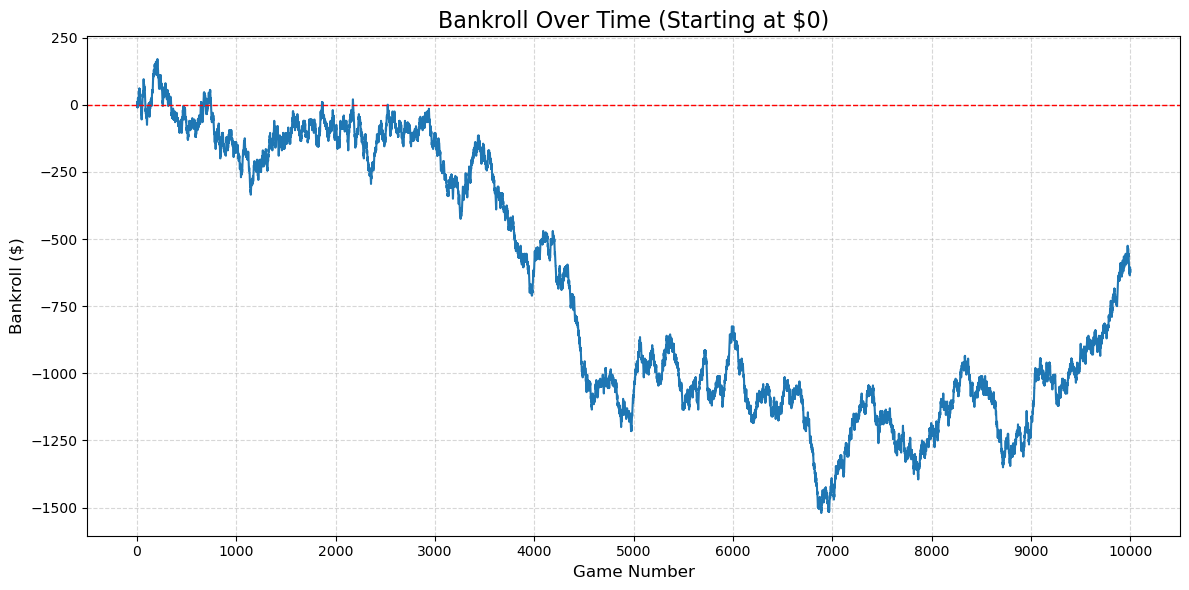

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(bankroll_history) + 1), bankroll_history, linewidth=1.5)

plt.axhline(0, color='red', linestyle='--', linewidth=1)  # horizontal line at y=0
plt.title('Bankroll Over Time (Starting at $0)', fontsize=16)
plt.xlabel('Game Number', fontsize=12)
plt.ylabel('Bankroll ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(ticks=range(0, len(bankroll_history) + 1, 1000)) #x label every 1000 games
plt.tight_layout() #just to make it look better
plt.show()


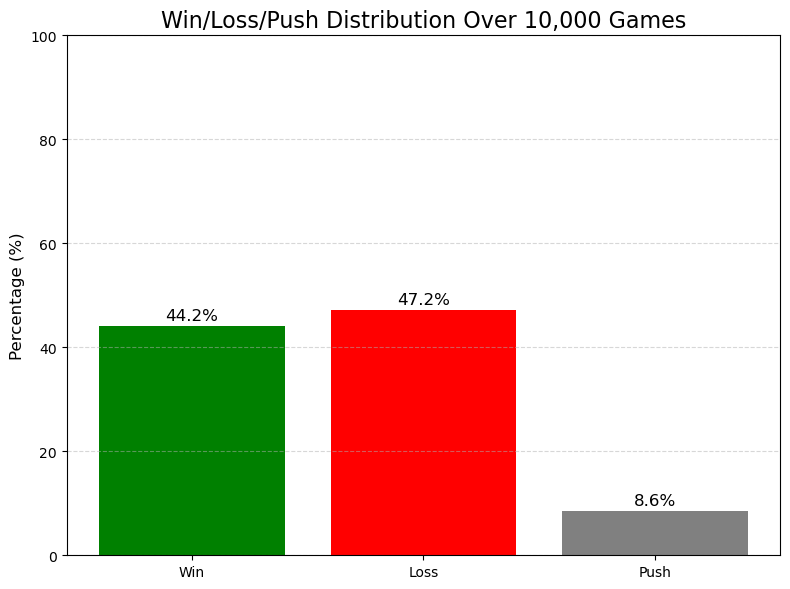

In [22]:
total_games = wins + losses + pushes

#calculate performance metrics
win_pct = (wins / total_games) * 100
loss_pct = (losses / total_games) * 100
push_pct = (pushes / total_games) * 100

#bar chart with 3 labels
labels = ['Win', 'Loss', 'Push']
percentages = [win_pct, loss_pct, push_pct]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, percentages, color=['green', 'red', 'gray']) #green for win, red for loss

for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{pct:.1f}%', ha='center', fontsize=12) #percentage labels above bars

plt.title('Win/Loss/Push Distribution Over 10,000 Games', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [34]:
def play_player_turn_with_options(player_hand, dealer_upcard, deck):
    """
    Plays the player's turn with basic doubling and splitting logic.

    Returns:
        hands (list of lists): One or two hands after play.
        bets (list of ints): Bet multiplier (1 or 2) for each hand.
    """
    hands = []
    bets = []

    # Check for potential split
    if player_hand[0][0] == player_hand[1][0]:
        rank = player_hand[0][0]
        if rank in ['A', '8']:  # Always split Aces and 8s
            for _ in range(2):
                new_hand = [player_hand[_]]
                new_hand.append(deal_card(deck))
                final_hand = play_out_hand(new_hand, dealer_upcard, deck)
                hands.append(final_hand)
                bets.append(1)
            return hands, bets

    # Check for potential double
    hand_value = calculate_hand_value(player_hand)
    if hand_value in [9, 10, 11]:
        player_hand.append(deal_card(deck))
        hands.append(player_hand)
        bets.append(2)  # Double bet
        return hands, bets

    # Normal play
    final_hand = play_out_hand(player_hand, dealer_upcard, deck)
    hands.append(final_hand)
    bets.append(1)
    return hands, bets


In [36]:
def play_out_hand(hand, dealer_upcard, deck):
    while player_should_hit(hand, dealer_upcard):
        hand.append(deal_card(deck))
        if calculate_hand_value(hand) > 21:
            break
    return hand


In [38]:
def play_blackjack_game_v2():
    deck = create_deck()
    player_hand = []
    dealer_hand = []

    player_hand.append(deal_card(deck))
    dealer_hand.append(deal_card(deck))
    player_hand.append(deal_card(deck))
    dealer_hand.append(deal_card(deck, show=False))

    dealer_upcard = dealer_hand[0]

    if calculate_hand_value(player_hand) == 21:
        return 15

    player_hands, bets = play_player_turn_with_options(player_hand, dealer_upcard, deck) #using helper function

    dealer_hand = play_dealer_turn(deck, dealer_hand)
    dealer_value = calculate_hand_value(dealer_hand)

    total_result = 0
    for hand, bet in zip(player_hands, bets):
        player_value = calculate_hand_value(hand)

        if player_value > 21:
            total_result -= 10 * bet
        elif dealer_value > 21 or player_value > dealer_value:
            total_result += 10 * bet
        elif player_value < dealer_value:
            total_result -= 10 * bet
        else:
            total_result += 0

    return total_result


In [40]:
bankroll_v2 = 0
bankroll_history_v2 = []

wins_v2 = 0
losses_v2 = 0
pushes_v2 = 0

num_games_v2 = 10000

for i in range(num_games_v2):
    profit_v2 = play_blackjack_game_v2()
    bankroll_v2 += profit_v2
    bankroll_history_v2.append(bankroll_v2)

    if profit_v2 == 15 or profit_v2 == 10:
        wins_v2 += 1
    elif profit_v2 == -10:
        losses_v2 += 1
    else:
        pushes_v2 += 1

In [42]:
total_games_v2 = wins_v2 + losses_v2 + pushes_v2

print(f"\n===== ADVANCED STRATEGY Results ({total_games_v2} games) =====")
print(f"Final Bankroll: ${bankroll_v2}")
print(f"Win %:  {100 * wins_v2 / total_games_v2:.2f}%")
print(f"Loss %: {100 * losses_v2 / total_games_v2:.2f}%")
print(f"Push %: {100 * pushes_v2 / total_games_v2:.2f}%")
print(f"Avg Profit per Game: ${bankroll_v2 / total_games_v2:.4f}")


===== ADVANCED STRATEGY Results (10000 games) =====
Final Bankroll: $10
Win %:  37.60%
Loss %: 41.84%
Push %: 20.56%
Avg Profit per Game: $0.0010


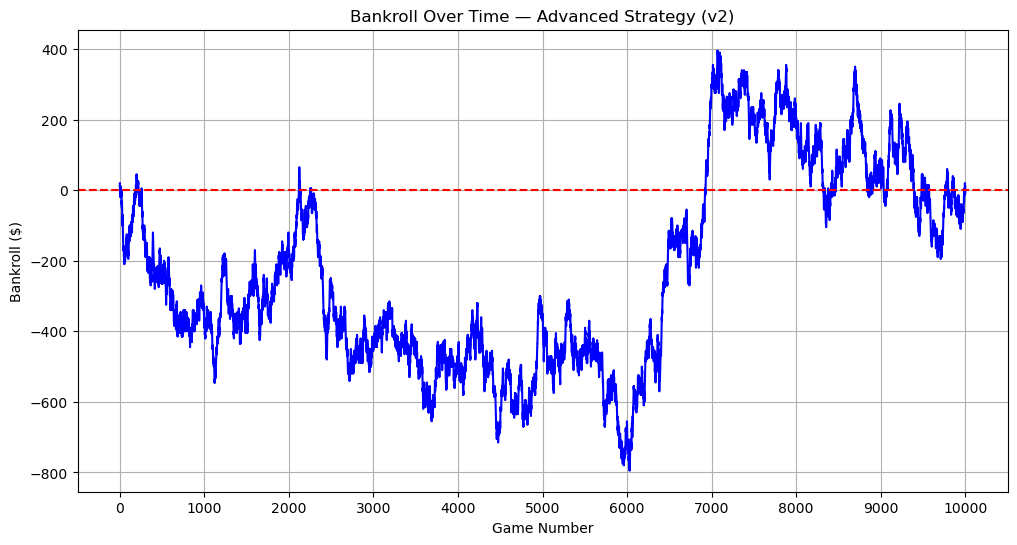

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(bankroll_history_v2, label='Bankroll Over Time (v2)', color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Break-even (y=0)')
plt.title('Bankroll Over Time — Advanced Strategy (v2)')
plt.xlabel('Game Number')
plt.ylabel('Bankroll ($)')
plt.grid(True)
plt.xticks(ticks=range(0, len(bankroll_history) + 1, 1000))
plt.show()

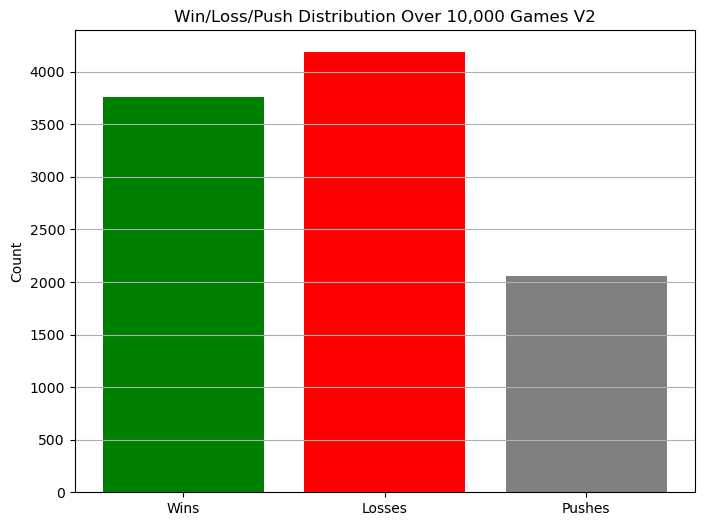

In [58]:
outcomes = ['Wins', 'Losses', 'Pushes']
counts = [wins_v2, losses_v2, pushes_v2]

    
plt.figure(figsize=(8, 6))
plt.bar(outcomes, counts, color=['green', 'red', 'gray'])
plt.title('Win/Loss/Push Distribution Over 10,000 Games V2')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()
